<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Manuel/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [27]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [28]:
!pip install yfinance==0.2.54
!pip install requests-cache

import requests_cache
session = requests_cache.CachedSession(cache_name='yfinance_cache', backend='sqlite', expire_after=3600)

In [29]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Apple Inc.


# Data Collection

### Stock Price

In [30]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-21 00:00:00-05:00,77.322381,77.766488,75.351829,75.970657,129554000,0.0,0.0
2020-02-24 00:00:00-05:00,72.138769,73.818104,70.190057,72.362030,222195200,0.0,0.0
2020-02-25 00:00:00-05:00,73.034258,73.417688,69.437753,69.910973,230673600,0.0,0.0
2020-02-26 00:00:00-05:00,69.534818,72.289226,69.527537,71.020012,198054800,0.0,0.0
2020-02-27 00:00:00-05:00,68.217075,69.406200,66.241664,66.377563,320605600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.0,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0
2025-02-18 00:00:00-05:00,244.149994,245.179993,241.839996,244.470001,48822500,0.0,0.0


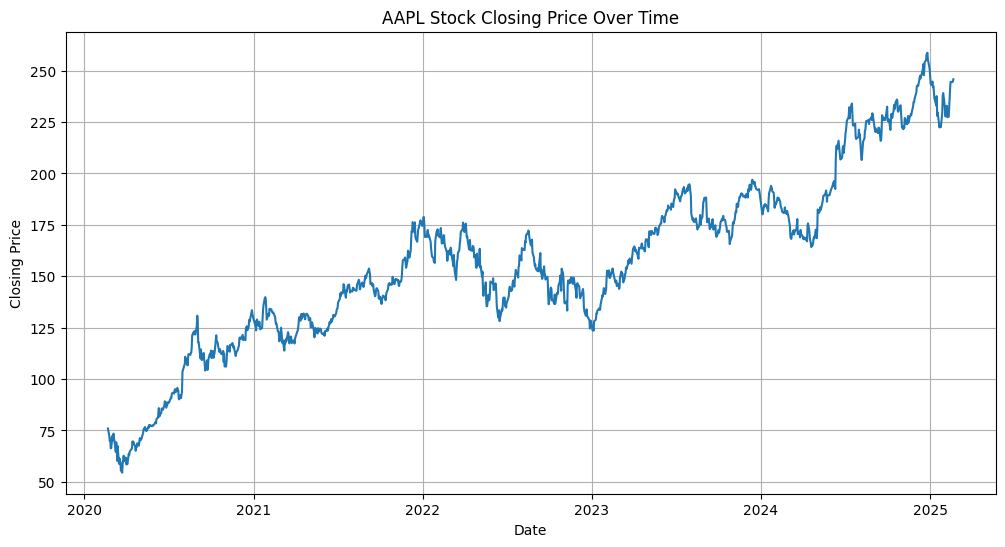

In [31]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [32]:
!pip install fredapi
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [33]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [34]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

##### Reddit seb scrapping

In [35]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [36]:

!pip install asyncpraw

import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error
import re

nest_asyncio.apply() # Preventing async loop error

#API certification
async def fetch_reddit():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit(f"{re.sub(r'[^A-Za-z0-9 ]+', '', firm_name.split(' ')[0]) }")  # await for async environment

    # list
    data = []

    async for post in subreddit.hot(limit=10):  # Top 10 posts
        data.append({
            "Title": post.title,
            "Score": post.score,
            "URL": post.url,
            "Content": post.selftext[:500] #Limit 500 words. revise possible
        })

    await reddit.close()  # await for api calling

    # DataFrame
    df = pd.DataFrame(data)
    return df

# Execution
loop = asyncio.get_event_loop() # Preventing async loop error
loop.run_until_complete(fetch_reddit())

,Title,Score,URL,Content
0,"Daily Advice Thread - February 20, 2025",3,https://www.reddit.com/r/apple/comments/1itvye...,Welcome to the Daily Advice Thread for /r/Appl...
1,Apple Says 'Severance' Is Now More Popular Tha...,3169,https://www.macrumors.com/2025/02/20/severance...,
2,Kuo: All iPhone 17 Models Will Feature Apple-D...,108,https://www.macrumors.com/2025/02/20/kuo-iphon...,
3,"Apple labeled the iPhone 16e as ""iPad 16e"" on ...",381,https://www.apple.com/no/iphone-16e/#:~:text=i...,
4,iPhone 15 Pro to Get Visual Intelligence in Fu...,304,https://www.macrumors.com/2025/02/20/visual-in...,
5,iPhone Feature for Tracking Lost Baggage Expan...,60,https://www.macrumors.com/2025/02/20/american-...,
6,Apple Polishing Cloth adds support for the new...,5746,https://www.apple.com/shop/product/MW693AM/A/p...,
7,New MacBook Air fails to get the most of its A...,42,https://www.notebookcheck.net/New-MacBook-Air-...,
8,16e launched,4113,https://www.apple.com/shop/buy-iphone/iphone-16e,
9,Estimating the cost to Apple of paying import ...,61,https://appleinsider.com/articles/25/02/20/ban...,


02.10 Ri-on: Added draft for web scrapping reddit posts

In [37]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list,
                                     "Title": article_title_list,
                                     "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,1 hour ago,Big Tech leaning further into humanoid robots:...,"Big Tech companies like Tesla (TSLA), Amazon (..."
1,5 hours ago,Alibaba is 'big beneficiary' of AI with partne...,Alibaba (BABA) shares gain after announcing st...
2,7 hours ago,Is the stock rally showing signs of stalling? ...,"US stocks (^DJI, ^IXIC, ^GSPC) are falling Thu..."
3,1 hour ago,Is Apple Stock A Buy After iPhone 16e Debut?,After the introduction of Apple's new lower-co...
4,2 hours ago,Ryan Cohen Boosts Alibaba Stake to $1 Billion,Ryan Cohen still has his sights set on Alibaba...
5,3 hours ago,Trump’s FBI Pick Stands to Make Millions From ...,Kash Patel was confirmed by the Senate Thursda...
6,3 hours ago,Apple’s iPhone 16e Is a Big Moment for the Com...,Apple’s newest iPhones will be the first to u...
7,3 hours ago,"What Is Quantum Computing, and Why Does It Mat...",Microsoft and Google have made breakthroughs i...
8,4 hours ago,"Magnificent Seven Stocks: Nvidia Rises, But Te...","Dubbed the Magnificent Seven stocks, Apple, Mi..."
9,5 hours ago,Apple Inc. (AAPL): Among the Best Long-Term St...,We recently compiled a list of the 12 Best Lon...


02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

Attempted fix at yahoo, changing max articles to 10000

In [38]:
import requests
from datetime import datetime

def get_yahoo_news(firm, max_articles=10000):                          # adjust max articles here
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0

    while len(articles) < max_articles:
        params = {
            "q": firm,
            "news_count": min(100, max_articles - len(articles)),  # API max per call
            "offset": offset,
            "lang": "en-US",
            "region": "US"
        }

        response = requests.get(
            url=base_url,
            params=params,
            headers={"User-Agent": "Mozilla/5.0"}
        )

        if response.status_code != 200 or not response.json().get('news'):
            break

        for article in response.json()['news']:
            # Use get method with a default value to handle missing 'summary' key
            summary = article.get('summary', 'N/A')
            articles.append({
                "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                "Title": article['title'],
                "Summary": summary,  # Assign the extracted or default summary
                "Source": article['publisher']
            })

        offset += params["news_count"]

    return pd.DataFrame(articles)[:max_articles]

# Usage
yh_article_df = get_yahoo_news(firm) # specify the firm parameter to get news of the specified firm.
yh_article_df

,Time,Title,Summary,Source
0,2025-02-20 22:10,Big Tech leaning further into humanoid robots:...,N/A,Yahoo Finance Video
1,2025-02-20 21:39,Is Apple Stock A Buy After iPhone 16e Debut?,N/A,Investor's Business Daily
2,2025-02-20 20:34,Ryan Cohen Boosts Alibaba Stake to $1 Billion,N/A,The Wall Street Journal
3,2025-02-20 19:55,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
4,2025-02-20 19:33,Apple’s iPhone 16e Is a Big Moment for the Com...,N/A,Barrons.com
...,...,...,...,...
6515,2025-02-20 19:55,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
6516,2025-02-20 19:33,Apple’s iPhone 16e Is a Big Moment for the Com...,N/A,Barrons.com
6517,2025-02-20 19:17,"What Is Quantum Computing, and Why Does It Mat...",N/A,The Wall Street Journal
6518,2025-02-20 19:02,"Magnificent Seven Stocks: Nvidia Rises, But Te...",N/A,Investor's Business Daily


this method uses API instead of webscraping, but we're still limited to the most recent articles. Yahoo api doesnt allow for more than 5 years


#### Testing out different news API's

##### TheNewsAPI

In [39]:
!pip install newsapi-python
import newsapi
import requests

api_key = 'VZnchCBfCg9fBUkfCR2llXDWIiTKRaK2iAIaboO5'

def get_historical_news(firm, years_back=5):
    """Retrieve news articles from past specified years using TheNewsAPI"""
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    start_date = pd.Timestamp.now() - pd.DateOffset(years=years_back)
    start_date = start_date.strftime('%Y-%m-%d')

    all_articles = []
    page = 1

    while True:
        params = {
            'api_token': api_key,
            'q': firm,
            'search_in': 'title,description',
            'from': start_date,
            'to': end_date,
            'language': 'en',
            'sort': 'published_at',
            'order': 'desc',
            'page': page,
            'domains': 'reuters.com,bloomberg.com,finance.yahoo.com'
        }

        response = requests.get('https://api.thenewsapi.com/v1/news/all', params=params)

        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break

        data = response.json()

        if not data['data']:
            break

        all_articles.extend(data['data'])
        page += 1

        # Free tier limit: 100 results
        if len(all_articles) >= 100 or page > 5:
            break

    return pd.DataFrame(all_articles)[['published_at', 'title', 'description', 'url']]

# Usage - get Negirmtflix articles from past 5 years
news_df = get_historical_news(firm_name, years_back=5)
print(f"Found {len(news_df)} articles")
news_df.head()


Found 15 articles


,published_at,title,description,url
0,2025-02-20T21:10:28.000000Z,Startup Together AI Valued at $3.3 Billion as ...,"(Bloomberg) -- Startup Together AI, which prov...",https://finance.yahoo.com/news/startup-togethe...
1,2025-02-20T21:07:06.000000Z,Rivian posts $170 million 'gross profit' in Q4...,Rivian reported strong fourth quarter results ...,https://finance.yahoo.com/news/rivian-posts-17...
2,2025-02-20T21:04:51.000000Z,"Stock market today: Dow slides 450 points, S&P...",Trump policy is in strong focus as tariffs and...,https://finance.yahoo.com/news/live/stock-mark...
3,2025-02-20T20:08:33.000000Z,Attorneys questioned Charlie Javice jurors if ...,Prosecutors begin opening statements in the tr...,https://finance.yahoo.com/news/attorneys-quest...
4,2025-02-20T19:03:36.000000Z,The downfall of AI startup Humane reveals the ...,The startup created its wearable AI device wit...,https://finance.yahoo.com/news/downfall-ai-sta...


##### Yfinance with 10k articles but with firm name

In [40]:
import requests
from datetime import datetime, timedelta

def get_yahoo_news(firm, years_back=5, max_articles=10000):
    """Retrieve historical news articles from Yahoo Finance API"""
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0
    retrieved = 0

    start_date = (datetime.now() - timedelta(days=365*years_back)).timestamp()

    while retrieved < max_articles:
        params = {
            'q': firm,
            'quotesCount': 0,
            'newsCount': 100,  # Max per request
            'region': 'US',
            'lang': 'en-US',
            'offset': offset
        }

        try:
            response = requests.get(
                base_url,
                params=params,
                headers={'User-Agent': 'Mozilla/5.0'}
            )

            if response.status_code != 200:
                print(f"Error {response.status_code}: {response.text}")
                break

            data = response.json()
            news_items = data.get('news', [])

            if not news_items:
                break

            # Filter and convert dates
            filtered = [
                item for item in news_items
                if item.get('providerPublishTime', 0) >= start_date
            ]

            articles.extend(filtered)
            retrieved += len(filtered)
            offset += len(news_items)

            print(f"Retrieved {len(articles)}/{max_articles} articles")

            # Rate limiting
            time.sleep(0.5)

        except Exception as e:
            print(f"Error: {str(e)}")
            break

    # Process results
    processed = []
    for article in articles[:max_articles]:
        processed.append({
            'Time': datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
            'Title': article['title'],
            'Summary': article.get('summary', 'N/A'),
            'Source': article['publisher']
        })

    return pd.DataFrame(processed)


In [41]:
# Usage
df = get_yahoo_news(firm_name, years_back=5)  # Test with Apple
print(f"Final article count: {len(df)}")
df.head(50)

Retrieved 20/10000 articles
Retrieved 40/10000 articles
Retrieved 60/10000 articles
Retrieved 80/10000 articles
Retrieved 100/10000 articles
Retrieved 120/10000 articles
Retrieved 140/10000 articles
Retrieved 160/10000 articles
Retrieved 180/10000 articles
Retrieved 200/10000 articles
Retrieved 220/10000 articles
Retrieved 240/10000 articles
Retrieved 260/10000 articles
Retrieved 280/10000 articles
Retrieved 300/10000 articles
Retrieved 320/10000 articles
Retrieved 340/10000 articles
Retrieved 360/10000 articles
Retrieved 380/10000 articles
Retrieved 400/10000 articles
Retrieved 420/10000 articles
Retrieved 440/10000 articles
Retrieved 460/10000 articles
Retrieved 480/10000 articles
Retrieved 500/10000 articles
Retrieved 520/10000 articles
Retrieved 540/10000 articles
Retrieved 560/10000 articles
Retrieved 580/10000 articles
Retrieved 600/10000 articles
Retrieved 620/10000 articles
Retrieved 640/10000 articles
Retrieved 660/10000 articles
Retrieved 680/10000 articles
Retrieved 700/1000

,Time,Title,Summary,Source
0,2025-02-20 22:10,Big Tech leaning further into humanoid robots:...,N/A,Yahoo Finance Video
1,2025-02-20 21:39,Is Apple Stock A Buy After iPhone 16e Debut?,N/A,Investor's Business Daily
2,2025-02-20 20:34,Ryan Cohen Boosts Alibaba Stake to $1 Billion,N/A,The Wall Street Journal
3,2025-02-20 19:55,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
4,2025-02-20 19:33,Apple’s iPhone 16e Is a Big Moment for the Com...,N/A,Barrons.com
5,2025-02-20 19:17,"What Is Quantum Computing, and Why Does It Mat...",N/A,The Wall Street Journal
6,2025-02-20 19:02,"Magnificent Seven Stocks: Nvidia Rises, But Te...",N/A,Investor's Business Daily
7,2025-02-20 18:20,"In India, Apple's iPhone 16e faces stiff compe...",N/A,TechCrunch
8,2025-02-20 18:08,Apple Inc. (AAPL): Among the Best Long-Term St...,N/A,Insider Monkey
9,2025-02-20 18:01,Alibaba is 'big beneficiary' of AI with partne...,N/A,Yahoo Finance Video


In [42]:
# Export to CSV with proper firm naming
filename = f"{firm_name.replace(' ', '_')}_news_articles.csv"  # Uses long name like Apple_Inc._news_articles.csv
yh_article_titles_df.to_csv(filename, index=False)

print(f"Successfully exported {len(yh_article_titles_df)} articles to {filename}")
print(f"Dataset contains news for: {firm_name} ({firm})")

Successfully exported 20 articles to Apple_Inc._news_articles.csv
Dataset contains news for: Apple Inc. (AAPL)


##### Yfinance with 10k articles but more data

In [43]:
# prompt: create csv for yh_article_df

yh_article_df.to_csv('yh_article_df.csv', index=False)


In [44]:
from datetime import datetime

def get_yahoo_news(firm, max_articles=100000):                          # adjust max articles here
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0

    while len(articles) < max_articles:
        params = {
            "q": firm,
            "news_count": min(100, max_articles - len(articles)),  # API max per call
            "offset": offset,
            "lang": "en-US",
            "region": "US"
        }

        response = requests.get(
            url=base_url,
            params=params,
            headers={"User-Agent": "Mozilla/5.0"}
        )

        if response.status_code != 200 or not response.json().get('news'):
            break

        for article in response.json()['news']:
            # Use get method with a default value to handle missing 'summary' key
            summary = article.get('summary', 'N/A')
            articles.append({
                "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                "Title": article['title'],
                "Summary": summary,  # Assign the extracted or default summary
                "Source": article['publisher']
            })

        offset += params["news_count"]

    return pd.DataFrame(articles)[:max_articles]

# Usage
yh_article_df = get_yahoo_news(firm) # specify the firm parameter to get news of the specified firm.
yh_article_df

,Time,Title,Summary,Source
0,2025-02-20 22:10,Big Tech leaning further into humanoid robots:...,N/A,Yahoo Finance Video
1,2025-02-20 21:39,Is Apple Stock A Buy After iPhone 16e Debut?,N/A,Investor's Business Daily
2,2025-02-20 20:34,Ryan Cohen Boosts Alibaba Stake to $1 Billion,N/A,The Wall Street Journal
3,2025-02-20 19:55,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
4,2025-02-20 19:33,Apple’s iPhone 16e Is a Big Moment for the Com...,N/A,Barrons.com
...,...,...,...,...
6515,2025-02-20 19:55,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
6516,2025-02-20 19:33,Apple’s iPhone 16e Is a Big Moment for the Com...,N/A,Barrons.com
6517,2025-02-20 19:17,"What Is Quantum Computing, and Why Does It Mat...",N/A,The Wall Street Journal
6518,2025-02-20 19:02,"Magnificent Seven Stocks: Nvidia Rises, But Te...",N/A,Investor's Business Daily


##### BETTER YFINANCE. 10 articles for 6 months

In [45]:
from datetime import datetime, timedelta

def get_yahoo_news(firm, max_articles_per_day=10, days_back=180):  # Changed to 180 days (approx. 6 months)
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0
    current_date = datetime.now()

    for _ in range(days_back):  # Iterate through each day
        articles_today = 0  # Count articles for the current day
        while articles_today < max_articles_per_day:
            params = {
                "q": firm,
                "news_count": min(100, max_articles_per_day - articles_today),
                "offset": offset,
                "lang": "en-US",
                "region": "US"
            }

            response = requests.get(
                url=base_url,
                params=params,
                headers={"User-Agent": "Mozilla/5.0"}
            )

            if response.status_code != 200 or not response.json().get('news'):
                break

            for article in response.json()['news']:
                article_date = datetime.fromtimestamp(article['providerPublishTime']).date()

                if article_date == current_date.date():  # Check if article is from today
                    summary = article.get('summary', 'N/A')
                    articles.append({
                        "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                        "Title": article['title'],
                        "Summary": summary,
                        "Source": article['publisher']
                    })
                    articles_today += 1
                else:
                    # Skip articles not from the current date
                    offset += 1
                    continue

            if articles_today == max_articles_per_day:
                break # exit inner loop if enough collected


            offset += params["news_count"]

        current_date -= timedelta(days=1)  # Go to the previous day
        offset = 0 # resetting offset to 0

    return pd.DataFrame(articles)

# Usage - get 10 articles per day for the past 6 months
yh_article_df = get_yahoo_news(firm, max_articles_per_day=10, days_back=180)  # Changed days_back to 180
yh_article_df

,Time,Title,Summary,Source
0,2025-02-20 22:10,Big Tech leaning further into humanoid robots:...,N/A,Yahoo Finance Video
1,2025-02-20 21:39,Is Apple Stock A Buy After iPhone 16e Debut?,N/A,Investor's Business Daily
2,2025-02-20 20:34,Ryan Cohen Boosts Alibaba Stake to $1 Billion,N/A,The Wall Street Journal
3,2025-02-20 19:55,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
4,2025-02-20 19:33,Apple’s iPhone 16e Is a Big Moment for the Com...,N/A,Barrons.com
5,2025-02-20 19:17,"What Is Quantum Computing, and Why Does It Mat...",N/A,The Wall Street Journal
6,2025-02-20 19:02,"Magnificent Seven Stocks: Nvidia Rises, But Te...",N/A,Investor's Business Daily
7,2025-02-20 18:20,"In India, Apple's iPhone 16e faces stiff compe...",N/A,TechCrunch
8,2025-02-20 22:10,Big Tech leaning further into humanoid robots:...,N/A,Yahoo Finance Video
9,2025-02-20 21:39,Is Apple Stock A Buy After iPhone 16e Debut?,N/A,Investor's Business Daily


In [46]:
# prompt: turn yh_article_df into a csv

yh_article_df.to_csv('yh_article_df.csv', index=False)


##### StockNewsAPI

In [57]:
import requests
import pandas as pd
from datetime import datetime

API_KEY = 'zqwojboeldqysvbkliununziog7dntszogiiykuf'
BASE_URL = 'https://stocknewsapi.com/api/v1'

def fetch_bulk_news(start_date='02202024', end_date='02202025', max_pages=500):
    """
    Fetch up to 50k articles (100 per page * 500 pages)
    Uses premium endpoint with historical data access
    """
    all_articles = []

    for page in range(1, max_pages+1):
        params = {
            'date': f'{start_date}-{end_date}',
            'items': 100,
            'page': page,
            'token': API_KEY,
            'sortby': 'rank',  # Most important articles first
            'sectors': 'financial',  # Financial sector focus
            'datatype': 'json'
        }

        try:
            response = requests.get(f"{BASE_URL}/all", params=params)

            if response.status_code == 429:
                print("Rate limited - waiting 60 seconds")
                time.sleep(60)
                continue

            data = response.json()

            if not data.get('data'):
                break

            # Extract key fields
            articles = [{
                'time': art['date'],
                'headline': art['title'],
                'content': art['text'],
                'tickers': ', '.join(art['tickers']),
                'sentiment': art.get('sentiment', 'neutral')
            } for art in data['data']]

            all_articles.extend(articles)

            # Progress tracking
            print(f"Page {page}: Collected {len(articles)} articles (Total: {len(all_articles)})")

            # Rate limit buffer
            time.sleep(0.5)

        except Exception as e:
            print(f"Error page {page}: {str(e)}")
            break

    return pd.DataFrame(all_articles)

# Execute
news_df = fetch_bulk_news()
news_df.to_csv('financial_news_2024-2025.csv', index=False)

# Run in batches with date ranges
date_ranges = [
    ('02202024', '05312024'),
    ('06012024', '08312024'),
    ('09012024', '11302024'),
    ('12012024', '02202025')
]

full_df = pd.concat([fetch_bulk_news(start, end) for start, end in date_ranges])

# Remove duplicates
full_df = full_df.drop_duplicates(subset=['headline', 'time'])




Error page 1: Expecting value: line 1 column 1 (char 0)
Error page 1: Expecting value: line 1 column 1 (char 0)
Error page 1: Expecting value: line 1 column 1 (char 0)
Error page 1: Expecting value: line 1 column 1 (char 0)
Error page 1: Expecting value: line 1 column 1 (char 0)


### Data Merging

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation